<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Edgar! Congratulations on submitting computer vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    
    
- It's also a good idea to display several photos, since we need to understand what kind of data we have;


- You have successfully defined train and test functions; 
    
    
- Correctly built a model; 


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, well done!
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! Your project is great and does not have any issues that need to be fixed. Therefore, I accept the project now.
    
     



I hope you enjoyed this topic. Good luck! 
    
<hr>
    
    
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
 
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

Project description

The supermarket chain Good Seed would like to explore whether Data Science can help them adhere to alcohol laws by making sure they do not sell alcohol to people underage. You are asked to conduct that evaluation, so as you set to work, keep the following in mind:

    The shops are equipped with cameras in the checkout area which are triggered when a person is buying alcohol
    Computer vision methods can be used to determine age of a person from a photo
    The task then is to build and evaluate a model for verifying people's age

To start working on the task, you'll have a set of photographs of people with their ages indicated.

## Initialization

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image
import os

In [2]:
datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [3]:
df = pd.read_csv('/datasets/faces/labels.csv')
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>
    


Good! 

</div>

In [4]:
df['file_name'] = df['file_name'].apply(lambda x: os.path.join("/datasets/faces/final_files", x))

In [5]:
# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_datagen_flow = datagen.flow_from_directory(
    '/datasets/fruits_small/',
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    subset='training',
    seed=12345)

val_datagen_flow = datagen.flow_from_directory(
    '/datasets/fruits_small/',
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    subset='validation',
    seed=12345)

Found 1266 images belonging to 12 classes.
Found 417 images belonging to 12 classes.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [8]:
df['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

In [9]:
df.shape

(7591, 2)

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Well done! 

</div>

## EDA

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum().sum()

0

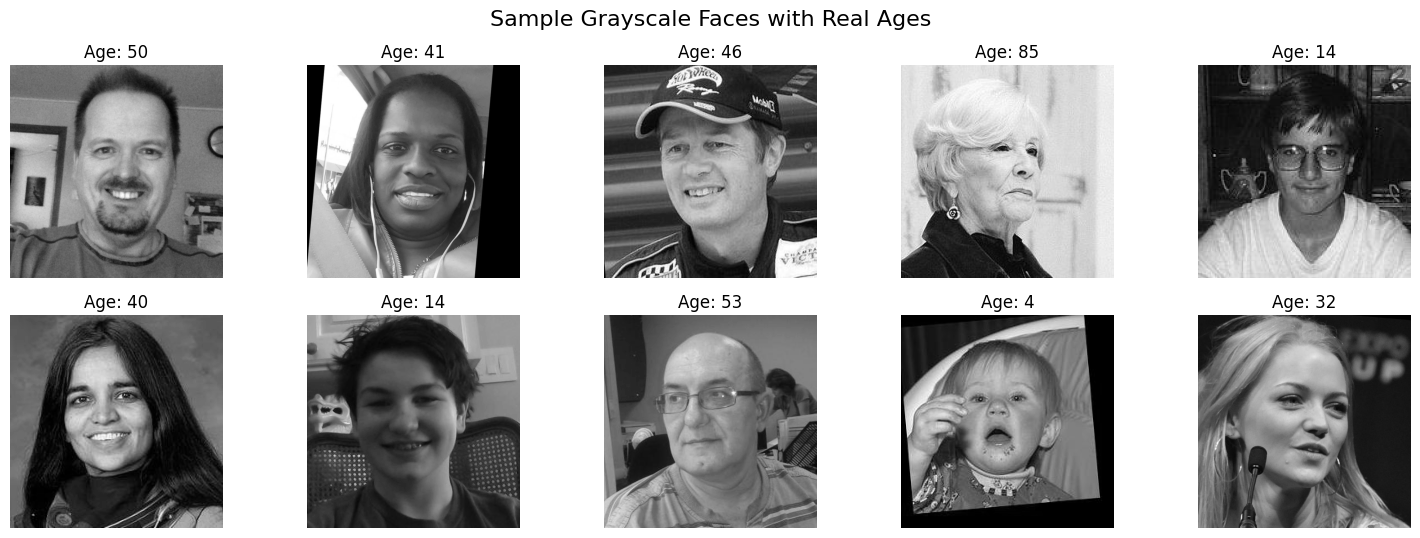

In [13]:
sample_rows = df.sample(10, random_state=12345)
image_dir = '/datasets/faces/final_files/'

# subplot
plt.figure(figsize=(15, 8))

# Loop through 10 images 
for i in range(10):
    path = os.path.join(image_dir, sample_rows.iloc[i]['file_name'])
    pic = Image.open(path).convert('L')  # to grayscale here

    plt.subplot(3, 5, i + 1)
    plt.imshow(pic, cmap='gray')  
    plt.title(f"Age: {sample_rows.iloc[i]['real_age']}")
    plt.axis('off')

plt.suptitle("Sample Grayscale Faces with Real Ages", fontsize=16)
plt.tight_layout()
plt.show()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment  </b>
    
Good! 
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

You don't need to print them in grey :) 
</div>

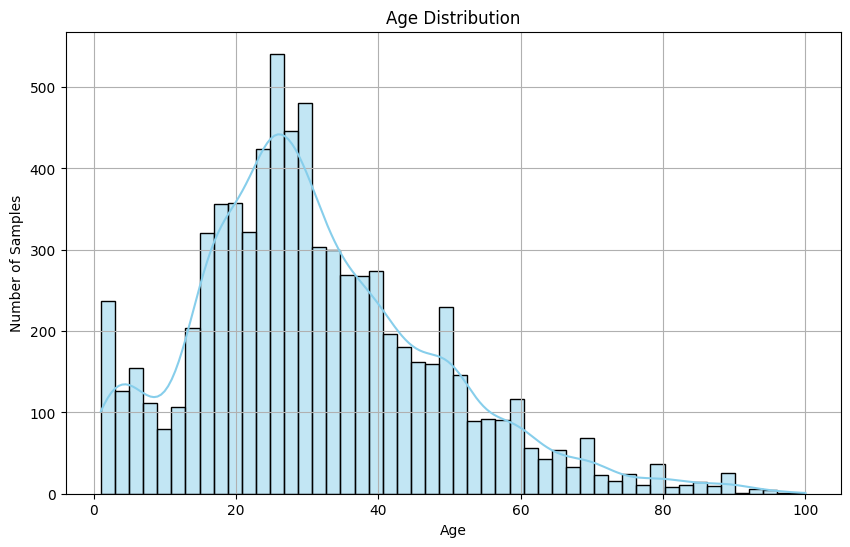

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['real_age'], bins=50, kde=True, color='skyblue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice chart 👍 
    
</div>


### Findings

**From the age distribution we can observe that the dataset covers a broad age range (1 to 100), and
most ages cluster between 20 and 40 and few extremely young (1–5) or very old (80+).**

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Good! 
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
It will be perfect if you describe photos as well. 
</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [15]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [1]:
def load_train(path, batch_size=32, target_size=(150, 150)):
    """
    It loads the train part of dataset from path
    """
    # Load CSV with file names and labels
    df = pd.read_csv(os.path.join(path, 'labels.csv'))

    # Append full file path to 'file_name'
    df['file_name'] = df['file_name'].apply(lambda x: os.path.join(path, 'final_files', x))

    # Split train/val here if needed
    df_train, _ = train_test_split(df, test_size=0.25, random_state=42)
    # Create generator
    datagen = ImageDataGenerator()
    
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=df_train,
        x_col='file_name',       
        y_col='real_age', 
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='raw',
        shuffle = True)
    
    return train_gen_flow

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>  Reviewer's comment </b>
    

Good! 

</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>  Reviewer's comment </b>
    

It's better to split the data outside the function and use the the `subset` and `validation_split` parameters here. </div>

In [17]:
def load_test(path, batch_size=32, target_size=(150, 150)):
    
    """
    It loads the validation/test part of dataset from path
    """
    # Load CSV and append full image paths
    df = pd.read_csv(os.path.join(path, 'labels.csv'))
    df['file_name'] = df['file_name'].apply(lambda x: os.path.join(path, 'final_files', x))

    # Create validation split (25%)
    _, df_val = train_test_split(df, test_size=0.25, random_state=42)

    # Create generator 
    test_datagen = ImageDataGenerator()
    
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=df_val,
        x_col='file_name',       # ✅ correct key
        y_col='real_age', 
        target_size=(150, 150),
        batch_size = batch_size,
        class_mode='raw',
        shuffle = False)
    
    return test_gen_flow

In [18]:
def create_model(input_shape):
    
    """
    It defines model
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    


    return model

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
    
    
- `Dense(1, activation='relu')` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.
    

- Adam optimizer with learning rate 0.0005 is a solid and commonly used choice, well done. 


- The use of MSE loss and MAE as metric is also correct. MSE encourages precision, and MAE helps us interpret error scale in the same units as the target.

</div>

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
        
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    """
    Trains the model given the parameters
    """
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True)
    
    return model

if __name__ == "__main__":
    train_gen = load_train("/datasets/faces/")
    val_gen = load_test("/datasets/faces/")

    model = create_model(input_shape=(150, 150, 3))
    model = train_model(model, train_gen, val_gen)

    loss, mae = model.evaluate(val_gen, verbose=2)
    print("Model MAE: {:5.2f}%".format(100 * mae))    

Found 5693 validated image filenames.
Found 1898 validated image filenames.


2025-05-21 21:01:03.273116: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
    
    
- `Dense(1, activation='relu')` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.
    
    
    
- While you could omit the activation or explicitly specify `linear`, `relu` may help because age should not be negative. 
    
    
    
- Adam optimizer with learning rate 0.0005 is a solid and commonly used choice, well done. 


- The use of MSE loss and MAE as metric is also correct. MSE encourages precision, and MAE helps us interpret error scale in the same units as the target.

</div>

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [ ]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

    

This part is not necessary because of the GPU issues.
    

By the way, you can use Markdown cell for your code and results: 

    ```python
    
    # code
    
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921  
```

## Conclusions

**Model was build however due to the fact that the GPU is not longer avaliable and also because my computer have a limit processing capacity i am not able to produce a data base conclusion on the model performance.**

**Thank you for your understanding.**

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

    

Yes, it's fine :) We can still think about further improvements. Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face.     
</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training